### 第三天解析日期<br>
1、搭建环境<br>
2、检查日期列的数据类型<br>
3、转换日期列类型为datetime<br>
4、从列中选择某个月的某一天<br>
5、画图检查日期解析<br>

##  1、搭建环境

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import datetime

#  读取数据
earthquakes = pd.read_csv(r'D:\data\kaggle\earthquake-database\database.csv')
landslides = pd.read_csv(r'D:\data\kaggle\landslide-events\catalog.csv')
volcanos = pd.read_csv(r'D:\data\kaggle\volcanic-eruptions\database.csv')

np.random.seed(0)

## 2、检查日期列的数据类型

In [5]:
landslides.head()

,id,date,time,continent_code,country_name,country_code,state/province,population,city/town,distance,...,geolocation,hazard_type,landslide_type,landslide_size,trigger,storm_name,injuries,fatalities,source_name,source_link
0,34,3/2/07,Night,NaN,United States,US,Virginia,16000,Cherry Hill,3.40765,...,"(38.600900000000003, -77.268199999999993)",Landslide,Landslide,Small,Rain,NaN,NaN,NaN,NBC 4 news,http://www.nbc4.com/news/11186871/detail.html
1,42,3/22/07,NaN,NaN,United States,US,Ohio,17288,New Philadelphia,3.33522,...,"(40.517499999999998, -81.430499999999995)",Landslide,Landslide,Small,Rain,NaN,NaN,NaN,Canton Rep.com,http://www.cantonrep.com/index.php?ID=345054&C...
2,56,4/6/07,NaN,NaN,United States,US,Pennsylvania,15930,Wilkinsburg,2.91977,...,"(40.4377, -79.915999999999997)",Landslide,Landslide,Small,Rain,NaN,NaN,NaN,The Pittsburgh Channel.com,https://web.archive.org/web/20080423132842/htt...
3,59,4/14/07,NaN,NaN,Canada,CA,Quebec,42786,Châteauguay,2.98682,...,"(45.322600000000001, -73.777100000000004)",Landslide,Riverbank collapse,Small,Rain,NaN,NaN,NaN,Le Soleil,http://www.hebdos.net/lsc/edition162007/articl...
4,61,4/15/07,NaN,NaN,United States,US,Kentucky,6903,Pikeville,5.66542,...,"(37.432499999999997, -82.493099999999998)",Landslide,Landslide,Small,Downpour,NaN,NaN,0.0,Matthew Crawford (KGS),NaN


In [6]:
landslides['date'].head()

0     3/2/07
1    3/22/07
2     4/6/07
3    4/14/07
4    4/15/07
Name: date, dtype: object

In [7]:
#  查看数据列的日期类型
landslides['date'].dtype

dtype('O')

In [8]:
#  查看地震数据的日期列类型
earthquakes.head()

,Date,Time,Latitude,Longitude,Type,Depth,Depth Error,Depth Seismic Stations,Magnitude,Magnitude Type,...,Magnitude Seismic Stations,Azimuthal Gap,Horizontal Distance,Horizontal Error,Root Mean Square,ID,Source,Location Source,Magnitude Source,Status
0,01/02/1965,13:44:18,19.246,145.616,Earthquake,131.6,NaN,NaN,6.0,MW,...,NaN,NaN,NaN,NaN,NaN,ISCGEM860706,ISCGEM,ISCGEM,ISCGEM,Automatic
1,01/04/1965,11:29:49,1.863,127.352,Earthquake,80.0,NaN,NaN,5.8,MW,...,NaN,NaN,NaN,NaN,NaN,ISCGEM860737,ISCGEM,ISCGEM,ISCGEM,Automatic
2,01/05/1965,18:05:58,-20.579,-173.972,Earthquake,20.0,NaN,NaN,6.2,MW,...,NaN,NaN,NaN,NaN,NaN,ISCGEM860762,ISCGEM,ISCGEM,ISCGEM,Automatic
3,01/08/1965,18:49:43,-59.076,-23.557,Earthquake,15.0,NaN,NaN,5.8,MW,...,NaN,NaN,NaN,NaN,NaN,ISCGEM860856,ISCGEM,ISCGEM,ISCGEM,Automatic
4,01/09/1965,13:32:50,11.938,126.427,Earthquake,15.0,NaN,NaN,5.8,MW,...,NaN,NaN,NaN,NaN,NaN,ISCGEM860890,ISCGEM,ISCGEM,ISCGEM,Automatic


In [9]:
earthquakes['Date'].head()

0    01/02/1965
1    01/04/1965
2    01/05/1965
3    01/08/1965
4    01/09/1965
Name: Date, dtype: object

In [10]:
earthquakes['Date'].dtype

dtype('O')

## 3、转换日期列为datetime

In [11]:
#  创建一个新的列，是解析后的日期
landslides['date_paresd'] = pd.to_datetime(landslides['date'], format="%m/%d/%y")
landslides['date_paresd'].head()

0   2007-03-02
1   2007-03-22
2   2007-04-06
3   2007-04-14
4   2007-04-15
Name: date_paresd, dtype: datetime64[ns]

In [15]:
landslides['date_paresd'].dtype

dtype('<M8[ns]')

  如果有的日期格式跟其他的不同，可以采用landslides['date_parsed'] = pd.to_datetime(landslides['Date'], infer_datetime_format=True)，不过并不建议用，首先infer_datetime_format未必可以推测出正确的方式，另外一个是速度方面会降低

In [19]:
earthquakes['date_parsed'] = pd.to_datetime(earthquakes['Date'], format='%m/%d/%y', infer_datetime_format=True)
earthquakes['date_parsed'].head()

0   1965-01-02
1   1965-01-04
2   1965-01-05
3   1965-01-08
4   1965-01-09
Name: date_parsed, dtype: datetime64[ns]

## 4、从列中选择某个月的某一天

In [24]:
day_of_month_landslides = landslides['date_paresd'].dt.day
day_of_month_landslides

0        2.0
1       22.0
2        6.0
3       14.0
4       15.0
5       20.0
6       24.0
7       21.0
8       27.0
9       27.0
10      27.0
11       1.0
12       4.0
13       8.0
14      13.0
15      24.0
16       9.0
17      11.0
18      14.0
19      17.0
20      18.0
21      18.0
22      18.0
23      19.0
24      19.0
25      20.0
26      21.0
27      21.0
28      23.0
29       1.0
        ... 
1663    17.0
1664    10.0
1665    31.0
1666    31.0
1667    22.0
1668     9.0
1669    23.0
1670    21.0
1671    21.0
1672    12.0
1673    15.0
1674    24.0
1675    24.0
1676    15.0
1677    24.0
1678    21.0
1679    24.0
1680    28.0
1681    24.0
1682    27.0
1683    27.0
1684    14.0
1685    26.0
1686    27.0
1687    29.0
1688     7.0
1689    22.0
1690    23.0
1691    26.0
1692     2.0
Name: date_paresd, Length: 1693, dtype: float64

In [27]:
day_of_month_earthquakes = earthquakes['date_parsed'].dt.day
day_of_month_earthquakes

0         2
1         4
2         5
3         8
4         9
5        10
6        12
7        15
8        16
9        17
10       17
11       24
12       29
13        1
14        2
15        4
16        4
17        4
18        4
19        4
20        4
21        4
22        4
23        4
24        4
25        4
26        4
27        4
28        4
29        4
         ..
23382    11
23383    14
23384    14
23385    16
23386    17
23387    17
23388    17
23389    18
23390    18
23391    18
23392    18
23393    18
23394    18
23395    20
23396    20
23397    20
23398    20
23399    21
23400    21
23401    24
23402    24
23403    25
23404    25
23405    27
23406    28
23407    28
23408    28
23409    28
23410    29
23411    30
Name: date_parsed, Length: 23412, dtype: int64

## 5、画图检查日期解析

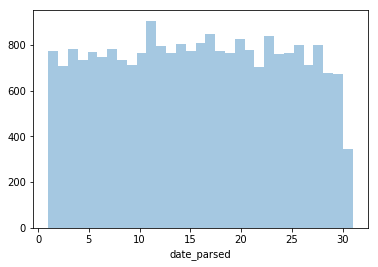

In [28]:
#  移除空值
day_of_month_landslides = day_of_month_landslides.dropna()
#  画图
sns.distplot(day_of_month_landslides, kde=False, bins=31)

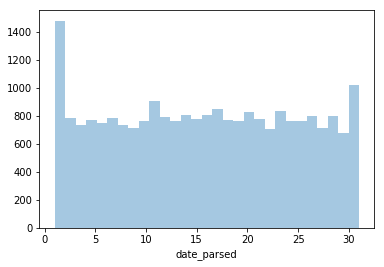

In [30]:
day_of_month_earthquakes = day_of_month_earthquakes.dropna()
sns.distplot(day_of_month_earthquakes, kde=False)